In [1]:
import hist
import numpy as np
from hist import Hist
from hist.svgutils import (
    SupportsStr,
    circle,
    div,
    html,
    line,
    polygon,
    polyline,
    rect,
    svg,
    text,
)

In [2]:
h = (
    Hist.new
    .Int(1,10, name="nice", label="x-axis")
    .Int(1,20, name="test", label="y-axis")
    .Int64()
)

h.fill(nice = np.random.normal(5, 1, 10), test = np.random.normal(5, 1, 10))

Hist(
  Integer(1, 10, name='nice', label='x-axis'),
  Integer(1, 20, name='test', label='y-axis'),
  storage=Int64()) # Sum: 10.0

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f5f6aee7c70>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f5f6ae925f0>, text=[])

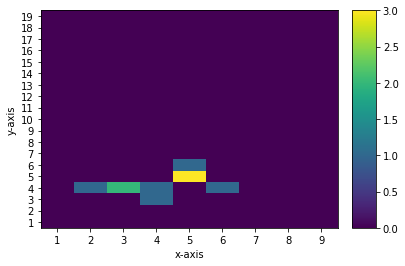

In [3]:
h.plot()

In [4]:
width = 250
height = 250
assert h.ndim == 2, "Must be 2D"

e0, e1 = (h.axes[0].edges, h.axes[1].edges)
ex = (e0 - e0[0]) / (e0[-1] - e0[0]) * width
ey = -(e1 - e1[0]) / (e1[-1] - e1[0]) * height

In [5]:
e0

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [6]:
e1

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20.])

In [7]:
ex

array([  0.        ,  27.77777778,  55.55555556,  83.33333333,
       111.11111111, 138.88888889, 166.66666667, 194.44444444,
       222.22222222, 250.        ])

In [8]:
ey

array([  -0.        ,  -13.15789474,  -26.31578947,  -39.47368421,
        -52.63157895,  -65.78947368,  -78.94736842,  -92.10526316,
       -105.26315789, -118.42105263, -131.57894737, -144.73684211,
       -157.89473684, -171.05263158, -184.21052632, -197.36842105,
       -210.52631579, -223.68421053, -236.84210526, -250.        ])

In [9]:
density = h.density()
max_dens = np.amax(density) or 1
norm_vals = density / max_dens

In [10]:
density

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.1, 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.3, 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. 

In [11]:
import zlib

In [12]:
max_dens

0.3

In [13]:
norm_vals

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.33333333, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.66666667, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.33333333, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.   

In [14]:
boxes = []
for r, (up_edge, bottom_edge) in enumerate(zip(ey[:-1], ey[1:])):
    ht = up_edge - bottom_edge
    for c, (left_edge, right_edge) in enumerate(zip(ex[:-1], ex[1:])):
        opacity = norm_vals[c, r]
        wt = left_edge - right_edge
        boxes.append(
            rect(
                x=left_edge,
                y=bottom_edge,
                width=round(abs(wt), 3),
                height=round(abs(ht), 3),
                opacity=opacity,
                fill="currentColor",
                stroke_width=0.1,
            )
        )

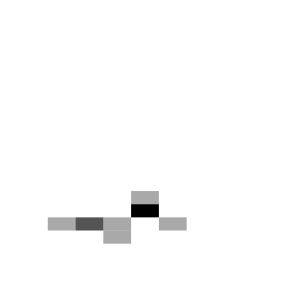

In [15]:
svg(*boxes, viewBox=f"{-20} {-height - 20} {width+40} {height+40}")